<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ceros_funciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Codigo Markdown:
Los numeras a, b, c y d tiene que ver con escritura en código Markdown y comandos de latex: 

a. Escriba en pseudocódigo los pasos para aplicar el método de la bisección.

b. Realice la deducción del metodo de Newton-Rapshon, se recomienda escribir las ecuaciones en formato latex, para ello puede emplear las siguientes expresiones:

c. ¿Cuál es la diferencia del metodo de Newton-Rapson con respecto al de la secante?


d. Escriba en pseudocódigo los pasos para aplicar el método Punto Fijo.



Comentarios para escribir en latex

*   Entre simbolos \$ \$, puedes porner expresiones  puede poner expresiones, ejemplo:  $y = a_0 x^2 + b_1$  

*  Las funciones pueden ser definidas entre \\$,  poniendo un \\, antes de la funcion ejemplo: \\$ \\sinx \\$,   asi las funciones quedarian de esta manera : 

> $\sin x$, $\tan x$, $\sec x$, $\sqrt{a} $, $\frac{a}{b}, \frac{df}{dt}$

* Puedes generar tambien escribir ecuaciones con la instrucción:

  \\begin{equation} 

    \\sin x  
  
  \\end{equation}

Ejemplo:

  \begin{equation} 
    \frac{df}{dx} = \sin x  
  \end{equation}







# 2. Ceros de funciones
*Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$ por diferentes metodos, bisection, newton-rapshon, punto fijo.

In [ ]:
import numpy as np 
import matplotlib.pylab as plt
import scipy as sc
import sympy as sp

x_bis = 1.0076239716563578


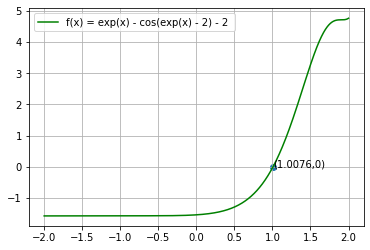

In [ ]:
#---------------------------------------------------------------------------------------------------------
# Raíz de la función f(x) = e^x -2 - cos(e^x -2) por el Método de Biseccion.


x=np.linspace(-2,2,1000)                             # Dominio de definición de la función.
f=lambda x: np.exp(x) - 2 - np.cos(np.exp(x) - 2)





x_bis = sc.optimize.bisect(f,-2,2)                   # Cero de la función

print(f'x_bis = {x_bis}')



#-------------------------------------------------------------

plt.plot(x,f(x),c='green',label='f(x) = exp(x) - cos(exp(x) - 2) - 2 ')
plt.scatter(x_bis,0)
plt.text(x_bis,0,f'({x_bis:.4f},0)')
plt.grid()
plt.legend()



In [ ]:
#---------------------------------------------------------------------------------------------------------
# Raíz de la función f(x) = e^x -2 - cos(e^x -2) por el Método de Newton.

# Obtenemos la derivada de la función de interés de forma simbólica a través sympy.


x= sp.symbols('x')   

F=lambda x: sp.exp(x) - 2 - sp.cos(sp.exp(x) - 2)

F_prima = sp.diff(F(x),x)

print('f(x) =', F(x),'\n''g(x) = f`(x) = ',F_prima )




f(x) = exp(x) - cos(exp(x) - 2) - 2 
g(x) = f`(x) =  exp(x)*sin(exp(x) - 2) + exp(x)


In [ ]:
# Convertimos f y f´ en funciones operables:


f=sp.lambdify(x,F(x),modules='numpy')
f_prima=sp.lambdify(x,F_prima,modules='numpy')




x_newton = sc.optimize.newton(f,0.7,f_prima) # Cero de la función

print(f'x_newton = {x_newton}')



x_newton = 1.0076239716581368


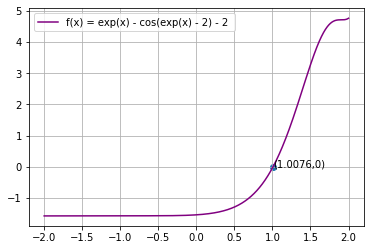

In [ ]:
x_=np.linspace(-2,2,1000)   # Dominio de definición de la función.
plt.plot(x_,f(x_),c='purple',label='f(x) = exp(x) - cos(exp(x) - 2) - 2 ')
plt.scatter(x_newton,0)
plt.text(x_newton,0,f'({x_newton:.4f},0)')
plt.grid()
plt.legend()

In [ ]:
#---------------------------------------------------------------------------------------------------------
# Raíz de la función f(x) = e^x -2 - cos(e^x -2) por el Método de la Secante.

x=np.linspace(-1,2,1000)                              #  Dominio de definición de la función.
f=lambda x: np.exp(x) - 2 - np.cos(np.exp(x) - 2)      # Definición de la función.


x_secante = sc.optimize.newton(f,0.7,fprime=None)
print(f'x_secante = {x_secante}')

x_secante = 1.007623971658234


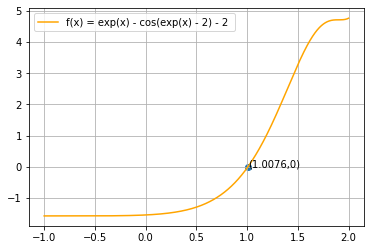

In [ ]:
plt.plot(x,f(x),c='orange',label='f(x) = exp(x) - cos(exp(x) - 2) - 2 ')
plt.scatter(x_secante,0)
plt.text(x_secante,0,f'({x_secante:.4f},0)')
plt.grid()
plt.legend()

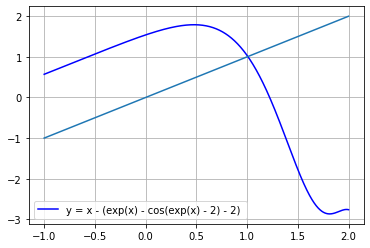

In [ ]:
#---------------------------------------------------------------------------------------------------------
# Raíz de la función f(x) = e^x -2 - cos(e^x -2) por el Método de Punto Fijo.

x=np.linspace(-1,2,1000)                              # Dominio de definición de la función.
f=lambda x: np.exp(x) - 2 - np.cos(np.exp(x) - 2)     # Definición de la función.
f_a=lambda x: x-f(x)                                  # Función auxiliar necesaria para aplicar el método de punto fijo con la libreria de  scipy.

plt.plot(x,f_a(x),c='blue',label='y = x - (exp(x) - cos(exp(x) - 2) - 2) ')
plt.plot(x,x)
plt.grid()
plt.legend(loc='best')


In [ ]:
p_0 = 0.7                             # Escogemos este punto crcano al cero de la función para utilizarlo en el metodo de la siguiente linea.
x_pfijo = sc.optimize.fixed_point(f_a, p_0)
print(f'x_pfijo = {x_pfijo}') 

x_pfijo = 1.0076239716581368


#3. Partícula en reposo
Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}-\sin\omega t\right) 
\end{equation}

Suponga que la particula se desplazo 0.51m en 1s. Encuentre, con exactitud de $10^{-5}$ la rapidez $\omega$ con que cambia $\theta$. Supoga $g=9.76$m/s

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
 

# Definicion de parámetros dados en el problema:

t1= 1       # Tiempo dado t1, [s]
x1= 0.51    # Posición de la partícula en t1, [m]
g = 9.76    # Aceleración de la gravedad, [m/s^2]
ϵ = 1e-5    # Precisión exigida

            # Incognita: ω, [rad/s]




La ecuación trascendente que surge de este problema es la siguiente:


\begin{equation}
\frac{2 x_1\omega^2}{g} + \left( \frac{e^{\omega t_1}-e^{-\omega t_1}}{2}-\sin\omega t_1\right) =0
\end{equation}

In [ ]:
# Ahora definimos una función a partir de la ecuación anterior, sobre la cual aplicaremos alguno de los métodos de hallazgo de ceros.

h=lambda ω :   ((2*x1)/g)*(ω**2) + (np.exp(t1*ω) - np.exp(-t1*ω))/2 - np.sin(t1*ω)






# Aplicando el método de la Secante:

a0=-2  # Para evitar que el programa nos arroje el valor ω00, ingresamos como punto de estimación inicial para el cero de interes en a = -2.

ω_sol=sc.optimize.newton(h, a0, tol=ϵ)

# Aplicando el método de la bisección
a=-0.4
b=-0.2
ω_sol=sc.optimize.bisect(h,a,b, xtol=ϵ)




print(f'La velocidad angular del plano por el que desciende la partícula sería de ω = {ω_sol:.5f} [rad/s],''\n'f'de tal modo que: h(ω_sol) = {h(ω_sol):.5}')





La velocidad angular del plano por el que desciende la partícula sería de ω = -0.31352 [rad/s],
de tal modo que: h(ω_sol) = 5.5599e-08


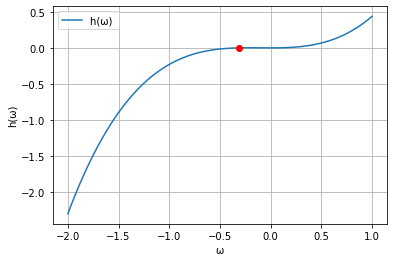

In [ ]:
ω = np.linspace(-2,1,100)

plt.plot(ω,h(ω),label= 'h(ω) ')
plt.xlabel("ω")
plt.ylabel("h(ω)")
plt.plot(ω_sol,0, "ro")

plt.grid()
plt.legend()

#4.  Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $g(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# a)  Area de un segmento circular : A_seg = (1/2)R² (θ - sinθ)


*Ecuacion transacendental a resolver:*


\begin{equation}
\frac{R^2 (\theta - sin\theta)}{2 } = \frac{\pi  R^2 }{4}  
\end{equation}

\begin{equation}
 \iff (\theta - sin\theta) = \frac{\pi}{2} 
\end{equation}



In [ ]:
# b) Definición de la función g(θ)

g = lambda θ : θ - np.sin(θ) - np.pi/2
dom_θ = np.linspace(-2*np.pi, 2*np.pi,1000)
ran_gθ= g(dom_θ ) 



# c) Data frame de los valores θ

df= pd.DataFrame( data = dom_θ, columns= ['θ'])
df

,θ
0,-6.283185
1,-6.270606
2,-6.258027
3,-6.245448
4,-6.232870
...,...
995,6.232870
996,6.245448
997,6.258027
998,6.270606


In [ ]:
#d) Insertamos la columna con los valores de la función evaluada en el dominio θ

df['g(θ)'] = ran_gθ
df

,θ,g(θ)
0,-6.283185,-7.853982
1,-6.270606,-7.853981
2,-6.258027,-7.853979
3,-6.245448,-7.853973
4,-6.232870,-7.853960
...,...,...
995,6.232870,4.712368
996,6.245448,4.712380
997,6.258027,4.712386
998,6.270606,4.712389


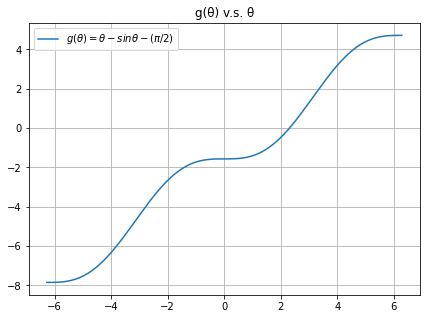

In [ ]:
# f) Gráfico de g(θ) vs θ

plt.figure(figsize=(7,5))
plt.title('g(θ) v.s. θ')
plt.plot(dom_θ ,g(dom_θ ), label = '$ g(θ)= θ -sinθ -(π/2)$')
#plt.xlabel('$ θ$', fontsize = 10)
#plt.ylabel('$ g(θ)$',fontsize = 10)

plt.legend()
plt.grid()

In [ ]:
# g),h),i),j)
#Raíces dela ecuación

# Método de Bisección:

θ_bis= sc.optimize.bisect(g,-2*np.pi,2*np.pi)
print(f'θ_bis = {θ_bis}')

θ_bis = 2.3098814600101703


In [ ]:
# Método de Newton-Raphson:( Antes de  aplicar este método , debemos definir la función derivada de g(θ) )

# Detivada de g(θ):

gprima= lambda θ: 1- np.cos(θ)

θ_newton=sc.optimize.newton(g,2,gprima)

print(f'θ_newton = {θ_newton}')

θ_newton = 2.3098814600100575


In [ ]:
# Método de la secante:

θ_secante=sc.optimize.newton(g,2,None)

print(f'θ_secante = {θ_secante}')


θ_secante = 2.309881460010033


In [ ]:
# Método de Punto fijo:( Como requisito para aplicar este método, se debe definir una función auxiliar g_a(θ) = θ - g(θ) )

g_a= lambda θ: θ-g(θ)

θ_pfijo= sc.optimize.fixed_point(g_a,2)
print(f'θ_pfijo = {θ_pfijo}')


θ_pfijo = 2.3098814600100575




# 5. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $). Supongamos, además, que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $\ u$ es la velocidad del viento y $\alpha$ el ángulo que hace la dirección de esta velocidad con el eje x, se puede encontrar las siguientes ecuaciones diferenciales asociadas al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):




*   \begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

*  \begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}
 







donde $\ b$  es el párametro de rozamiento. 

Las soluciones a las ecuaciones anteriores vienen dadas por:


***Posición en x***
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

***Posicion en y ***
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguientes condiciones inciales:

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula. Para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10° y 80°, cada 5°.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc


#0. Asignación de las condiciones y parámetros iniciales :

v0 = 60                #Velocidad en m/s
α = np.pi              #Angulo del viento
θi = np.deg2rad(45)    #Angulo de lanzamiento
u = v0/2               #rapidez del viento [m/s]
b = 0.05               #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad [m/s2]



Params = (α, v0, b, u,g) 

In [ ]:
1. #Componentes del vector posición del proyectil:

# Posicion en x
def pos_x(t, θi, α, v0, b, u,g):

  T1= u*(np.cos(α))*t
  T2= v0*(np.cos(θi)) - u*(np.cos(α))
  T3= (1- np.exp(-b*t))

  x = T1 + (T2*T3)/b

  return x



# Posicion en y
def pos_y(t, θi, α, v0, b, u,g):
  T1= (g/b) + v0*(np.sin(θi)) -u*(np.sin(α))
  T2= ((g/b) -  u*(np.sin(α)))*t
  T3= (1- np.exp(-b*t))
  y =  (T1*T3)/b -T2
  return y

In [ ]:
# 2.Diccionario:

dom_tiempo=np.linspace(0,8.1,1000)

dic= {"X":pos_x(dom_tiempo,θi,*Params) , "Y":pos_y(dom_tiempo,θi,*Params), "Tiempo":dom_tiempo}







In [ ]:
#3. Dataframe generado desde el diccionario anterior:

df=pd.DataFrame.from_dict(dic)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.000000
1,0.343879,0.343606,0.008108
2,0.687520,0.686429,0.016216
3,1.030923,1.028468,0.024324
4,1.374088,1.369725,0.032432
...,...,...,...
995,238.798457,1.625457,8.067568
996,238.947446,1.327489,8.075676
997,239.096276,1.028999,8.083784
998,239.244948,0.729985,8.091892


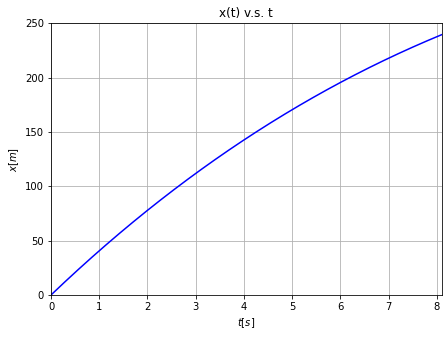

In [ ]:
# 4.
# Posición en x en términos del tiempo

plt.figure(figsize=(7,5),)
plt.title('x(t) v.s. t')
plt.plot(df['Tiempo'] ,df['X'],color="blue")
plt.xlim(0,8.1)
plt.ylim(0,250)
plt.xlabel('$ t [s]$', fontsize = 10)
plt.ylabel('$ x [m]$',fontsize = 10)


plt.grid()



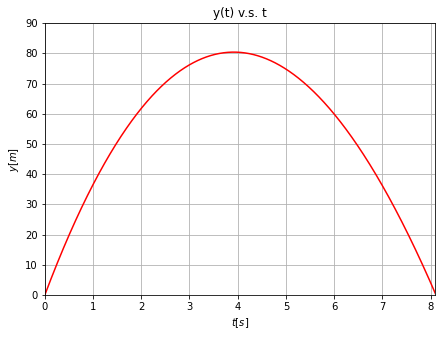

In [ ]:
# Posición en y en términos del tiempo

plt.figure(figsize=(7,5))
plt.title('y(t) v.s. t')
plt.plot(df['Tiempo'] ,df['Y'], color="red")
plt.xlim(0,8.1)
plt.ylim(0,90)
plt.xlabel('$ t [s]$', fontsize = 10)
plt.ylabel('$ y [m]$',fontsize = 10)


plt.grid()

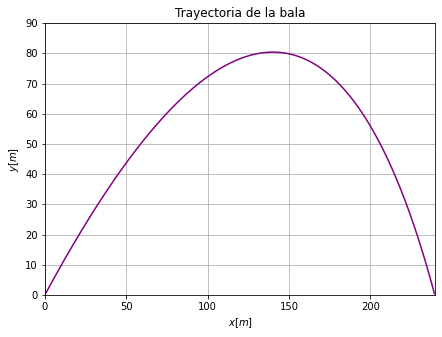

In [ ]:
# Gráfica de la trayectoria del proyectil

plt.figure(figsize=(7,5))
plt.title('Trayectoria de la bala')
plt.plot(df['X'] ,df['Y'], color="purple")
plt.xlim(0,240)
plt.ylim(0,90)
plt.xlabel("$ x [m]$")
plt.ylabel("$ y [m]$")

plt.grid()

In [ ]:
#5. Determinación del alcance máximo del proyectil:
# Consideremos la ecuación y = 0, y encontremos el tiempo para el cual el proyectil vuelve a estar a ras de suelo:


# Posicion en y
def y(t, θi, α, v0, b, u,g):
  T1= (g/b) + v0*(np.sin(θi)) -u*(np.sin(α))
  T2= ((g/b) -  u*(np.sin(α)))*t
  T3= (1- np.exp(-b*t))
  y =  (T1*T3)/b -T2
  return y

#-----------------------------------


t0= 8                  # Valor cercano a la raiz verdaera de la funcion y.



# Apliquemos el método de la secante:
t_f= sc.optimize.newton(y, t0, args=Params)

print(f'Tiempo de vuelo: t_f = {t_f:.4f} s')




Tiempo de vuelo: t_f = 8.1116 s


In [ ]:
#  Ahora sustituimos el valor del tiempo de vuelo de la bala en la ecuación de posición x, para encontrar el  alcance máximo:

x_max = pos_x(t_f,*Params)
print(f'Alcance máximo bajo las condiciones dadas: x_max = {x_max:.4f} m')

Alcance máximo bajo las condiciones dadas: x_max = 239.6061 m


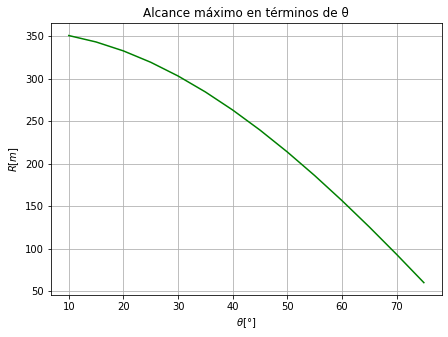

In [ ]:

#6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10° y 80°, cada 5°.





v0 = 60                #Velocidad en m/s
α = np.pi              #Angulo del viento
θi = np.deg2rad(45)    #Angulo de lanzamiento
u = v0/2               #rapidez del viento [m/s]
b = 0.05               #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad [m/s2]


R= lambda θ: pos_x(t_f,θ,α, v0, b, u,g)  # Función alcance máximo en términos del ángulo de disparo

rang_θ_deg=np.arange(10,80,5)
rang_θ=np.arange(np.deg2rad(10),np.deg2rad(80),np.deg2rad(5))



plt.figure(figsize=(7,5))
plt.title('Alcance máximo en términos de θ')
plt.plot(rang_θ_deg ,R(rang_θ), color="green")

plt.xlabel("$ θ [°]$")
plt.ylabel("$ R [m]$")

plt.grid()


# 6. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

```
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```

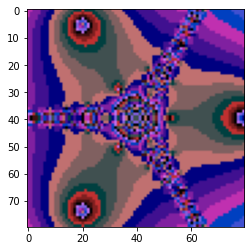

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

#----------------------------------------------------------------------------
#Inicialización

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1

#----------------------------------------------------------------------------
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)

zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4        # incremento de la variable z
def fpn(z, h):  # aproximación de la derivada de f(z)
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 555
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):     # Metodo de Newton-Raphson par a la función compleja f(z)
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)